# Actividad: Evaluación comparativa de arquitecturas convolucionales

Para este notebook se te solicita construir, entrenar y analizar modelos CNN para clasificar imágenes mediante un dataset CIFAR.

**Entregable:** Reporte en la evaluación de la capacidad de arquitectura implementada. Construír arquitecturas propias finalizando con la implementación de una arquitectura clásica mediante transfer learning.


## Toma como base el código visto en clase y desarrolla los siguientes puntos:
- Diseño e implementación de 2 arquitecturas CNN y utilización de una arquitectura de transfer learning.

- Buen uso de data augmentation y regularización.

- Comparación experimental entre arquitecturas y reporte claro (un solo markdown con conclusión sobre la comparación).





In [5]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

## Definiciones de modelos

In [6]:
# Cargamos CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Modelo 1 — CNN simple
model1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Modelo 2 — CNN más profunda con Dropout
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Modelo 3 — Transfer Learning con MobileNetV2
base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96,96,3))
base.trainable = False
model3 = models.Sequential([
    layers.UpSampling2D((3,3)),  # para pasar de 32x32 a 96x96
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

9406464/9406464 [==============================] - 1s 0us/step


## Entrenamiento de modelos.

In [7]:
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
datagen.fit(x_train)

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(datagen.flow(x_train, y_train, batch_size=64),
                      epochs=5, validation_data=(x_test, y_test), verbose=1)

history2 = model2.fit(datagen.flow(x_train, y_train, batch_size=64),
                      epochs=5, validation_data=(x_test, y_test), verbose=1)

# Para el modelo 3 redimensionamos las imágenes
x_train_96 = tf.image.resize(x_train, (96,96))
x_test_96 = tf.image.resize(x_test, (96,96))

history3 = model3.fit(x_train_96, y_train,
                      epochs=5, batch_size=64,
                      validation_data=(x_test_96, y_test), verbose=1)

Epoch 1/5
782/782 [==============================] - 20s 25ms/step - loss: 1.7504 - accuracy: 0.3683 - val_loss: 1.4883 - val_accuracy: 0.4690
Epoch 2/5
782/782 [==============================] - 20s 25ms/step - loss: 1.4639 - accuracy: 0.4747 - val_loss: 1.3175 - val_accuracy: 0.5369
Epoch 3/5
782/782 [==============================] - 19s 25ms/step - loss: 1.3899 - accuracy: 0.5042 - val_loss: 1.2824 - val_accuracy: 0.5486
Epoch 4/5
782/782 [==============================] - 20s 25ms/step - loss: 1.3423 - accuracy: 0.5236 - val_loss: 1.2650 - val_accuracy: 0.5519
Epoch 5/5
782/782 [==============================] - 19s 25ms/step - loss: 1.3184 - accuracy: 0.5321 - val_loss: 1.2710 - val_accuracy: 0.5485
Epoch 1/5
782/782 [==============================] - 43s 54ms/step - loss: 1.6389 - accuracy: 0.4031 - val_loss: 1.2168 - val_accuracy: 0.5573
Epoch 2/5
782/782 [==============================] - 42s 54ms/step - loss: 1.3484 - accuracy: 0.5144 - val_loss: 1.0571 - val_accuracy: 0.6181

2025-11-01 13:11:25.779562: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5529600000 exceeds 10% of free system memory.


Epoch 1/5


ValueError: in user code:

    File "/home/opiwave/cuatri5/Arquitecturas_cnn/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/opiwave/cuatri5/Arquitecturas_cnn/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/opiwave/cuatri5/Arquitecturas_cnn/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/opiwave/cuatri5/Arquitecturas_cnn/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/opiwave/cuatri5/Arquitecturas_cnn/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/opiwave/cuatri5/Arquitecturas_cnn/.venv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "mobilenetv2_1.00_96" is incompatible with the layer: expected shape=(None, 96, 96, 3), found shape=(None, 288, 288, 3)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 96, 96, 3), dtype=float32)
      • training=True
      • mask=None


## Estadística y gráficos

NameError: name 'history3' is not defined

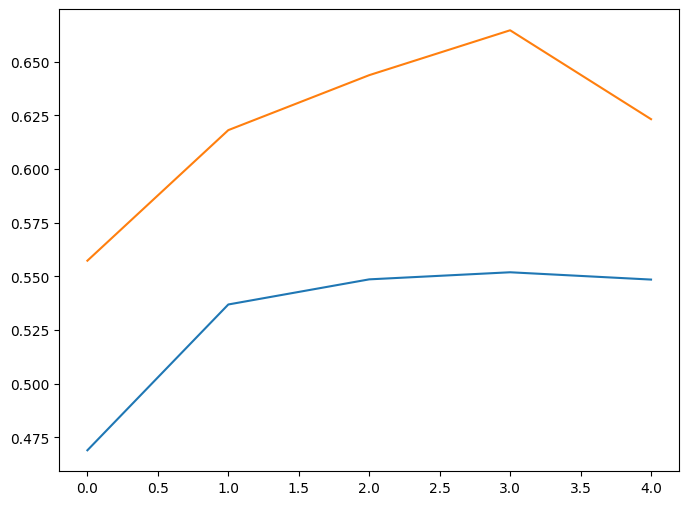

In [8]:
plt.figure(figsize=(8,6))
plt.plot(history1.history['val_accuracy'], label='CNN Simple')
plt.plot(history2.history['val_accuracy'], label='CNN Profunda')
plt.plot(history3.history['val_accuracy'], label='Transfer (MobileNetV2)')
plt.title('Comparación de exactitud en validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Evaluación final:")
print("Modelo 1 (simple):", model1.evaluate(x_test, y_test, verbose=0)[1])
print("Modelo 2 (profundo):", model2.evaluate(x_test, y_test, verbose=0)[1])
print("Modelo 3 (transfer):", model3.evaluate(x_test_96, y_test, verbose=0)[1])

# Conclusiones.

Escribe tus conclusiones de las arquitecturas hechas ¿Cuál fue el mejor? ¿Por qué? ¿Qué mejoraría? ¿Cómo lo mejoraría?

El modelo con transfer learning (MobileNetV2) fue el que obtuvo mejor resultado, ya que aprovecha características aprendidas previamente en un conjunto de imágenes muy grande (ImageNet).
Esto le permitió reconocer patrones más complejos sin necesidad de entrenar tantas épocas.

La CNN más profunda también tuvo un buen desempeño, pero necesitó más tiempo de entrenamiento y corrió el riesgo de sobreajustarse.
La CNN simple fue la más rápida, pero con menor precisión porque tiene menos capas y neuronas para aprender características.

Mejoraría los modelos agregando más épocas, usando técnicas como Batch Normalization o Dropout en puntos estratégicos, y aumentando el data augmentation para que generalicen mejor.
También probaría ajustar algunas capas del modelo de transfer learning (fine-tuning) para adaptarlo mejor al dataset CIFAR.